In [1]:
import dionysus as d
import numpy as np
from pprint import pprint

# creating a $n$-dimensional simplex

below is an example of creating a 2 dimensional complex, checking the complex
and iterating of the vertex. We can also compute the boundary of the simplex
$$ \partial[v] = \sum_{n=1}^{i} (-1)^{i}[v_{1}, \cdots, \hat{v_{j}}, \cdots, v_{n}]$$

In [2]:
# A simplex is simply a list vertices. It's represented by the simplex Class:
simplex = d.Simplex([0,1,2,3])
print("Dimension:", simplex.dimension())
print("Simplex:", simplex)
index = 0
for simplicialBoundary in simplex.boundary():
    # set an index of the simplex
    simplicialBoundary.data = index
    print("boundary:", simplicialBoundary)
    for subSimplex in simplicialBoundary.boundary():
        subSimplex.data = index
        print("subBoundary:", subSimplex)
    index +=1
for vertex in simplex:
    ## iterating over vertex
    print("vertex:", vertex)
    
simplicialComplex = []

Dimension: 3
Simplex: <0,1,2,3> 0
boundary: <1,2,3> 0
subBoundary: <2,3> 0
subBoundary: <1,3> 0
subBoundary: <1,2> 0
boundary: <0,2,3> 1
subBoundary: <2,3> 1
subBoundary: <0,3> 1
subBoundary: <0,2> 1
boundary: <0,1,3> 2
subBoundary: <1,3> 2
subBoundary: <0,3> 2
subBoundary: <0,1> 2
boundary: <0,1,2> 3
subBoundary: <1,2> 3
subBoundary: <0,2> 3
subBoundary: <0,1> 3
vertex: 0
vertex: 1
vertex: 2
vertex: 3


# closure
we can generate all the subSimplicies or $k$-simplicies. For example, an 8-sphere is the 8-dimensional skeleton of the closure of the 9-simplex.

In [3]:
simplex4 = d.Simplex([0,1,2])
sphere1  = d.closure([simplex4], 2)
print(sphere1)

[<0,2> 0, <0,1> 0, <1,2> 0, <0> 0, <1> 0, <2> 0, <0,1,2> 0]


# filteration
A filtration is a nested sequence of simplicial complexes, 𝐾1⊆𝐾2⊆…⊆𝐾𝑛. Without loss of generality, we can assume that two consecutive complexes in the filtration differ by a single simplex, so we can think of a filtration as a sequence of simplices.

In [4]:
# A simplex is simply a list vertices. It's represented by the simplex Class:
simplex = d.Simplex([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
print("Dimension:", simplex.dimension())
print("Simplex:", simplex)
index = 0
for simplicialBoundary in simplex.boundary():
    # set an index of the simplex
    simplicialBoundary.data = index
    print("boundary:", simplicialBoundary)
    for subSimplex in simplicialBoundary.boundary():
        subSimplex.data = index
        print("subBoundary:", subSimplex)
    index +=1
for vertex in simplex:
    ## iterating over vertex
    print("vertex:", vertex)
    
simplicialComplex = []

Dimension: 15
Simplex: <0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15> 0
boundary: <1,2,3,4,5,6,7,8,9,10,11,12,13,14,15> 0
subBoundary: <2,3,4,5,6,7,8,9,10,11,12,13,14,15> 0
subBoundary: <1,3,4,5,6,7,8,9,10,11,12,13,14,15> 0
subBoundary: <1,2,4,5,6,7,8,9,10,11,12,13,14,15> 0
subBoundary: <1,2,3,5,6,7,8,9,10,11,12,13,14,15> 0
subBoundary: <1,2,3,4,6,7,8,9,10,11,12,13,14,15> 0
subBoundary: <1,2,3,4,5,7,8,9,10,11,12,13,14,15> 0
subBoundary: <1,2,3,4,5,6,8,9,10,11,12,13,14,15> 0
subBoundary: <1,2,3,4,5,6,7,9,10,11,12,13,14,15> 0
subBoundary: <1,2,3,4,5,6,7,8,10,11,12,13,14,15> 0
subBoundary: <1,2,3,4,5,6,7,8,9,11,12,13,14,15> 0
subBoundary: <1,2,3,4,5,6,7,8,9,10,12,13,14,15> 0
subBoundary: <1,2,3,4,5,6,7,8,9,10,11,13,14,15> 0
subBoundary: <1,2,3,4,5,6,7,8,9,10,11,12,14,15> 0
subBoundary: <1,2,3,4,5,6,7,8,9,10,11,12,13,15> 0
subBoundary: <1,2,3,4,5,6,7,8,9,10,11,12,13,14> 0
boundary: <0,2,3,4,5,6,7,8,9,10,11,12,13,14,15> 1
subBoundary: <2,3,4,5,6,7,8,9,10,11,12,13,14,15> 1
subBoundary: <0,3,4,5,6,7

In [5]:
simplices = [([2], 4), ([1,2], 5), ([0,2], 6),
             ([0], 1),   ([1], 2), ([0,1], 3)]

filtration = d.Filtration()
for vertices, time in simplices:
    filtration.append(d.Simplex(vertices, time))
filtration.sort()

for simplex in filtration:
    print("simplex: ", simplex)
    
# look up the index of the gievn simplex (index starts at 0)
print("index of [1,2]: ", filtration.index(d.Simplex([1,2])))

simplex:  <0> 1
simplex:  <1> 2
simplex:  <0,1> 3
simplex:  <2> 4
simplex:  <1,2> 5
simplex:  <0,2> 6
index of [1,2]:  4


Persistent Homology

Applying homology functor to the filtration, we get a sequence of homology groups, connected by linear maps: 𝐻∗(𝐾1)→𝐻∗(𝐾2)→…→𝐻∗(𝐾𝑛)
. To compute decomposition of this sequence, i.e., persistence barcode, we use homology_persistence(), which returns its internal representation of the reduced boundary matrix:

In [6]:
matrixHomology = d.homology_persistence(filtration)
for index, chain in enumerate(matrixHomology):
    print('index: ', index)
    print('chain: ', chain)

index:  0
chain:  
index:  1
chain:  
index:  2
chain:  1*0 + 1*1
index:  3
chain:  
index:  4
chain:  1*1 + 1*3
index:  5
chain:  


We can manually extract the persistence pairing from the reduced matrix:
We can also use the init_diagrams() function, by providing it access to the filteraton

In [7]:
for index in range(len(matrixHomology)):
    if matrixHomology.pair(index) < index:
        continue
    dim = filtration[index].dimension()
    if matrixHomology.pair(index) != matrixHomology.unpaired:
        print("dimension, index, pair")
        print(dim, index, matrixHomology.pair(index))
    else:
        print('dimension, index')
        print(dim, index)

print(" ")
print("********************** next ***********************")
print(" ")
dgms = d.init_diagrams(matrixHomology, filtration)
print(dgms)
for index, dgm in enumerate(dgms):
    for pt in dgm:
        print("index, birth, death")
        print(index, pt.birth, pt.death)

print(" ")
print("H_1:                                                               pt6-->")
print("               pt2birth --> pt3death      pt4birth --> pt5death         " )         
print("H_0: pt0 -------------------------------------------------------------->")

dimension, index
0 0
dimension, index, pair
0 1 2
dimension, index, pair
0 3 4
dimension, index
1 5
 
********************** next ***********************
 
[Diagram with 3 points, Diagram with 1 points]
index, birth, death
0 1.0 inf
index, birth, death
0 2.0 3.0
index, birth, death
0 4.0 5.0
index, birth, death
1 6.0 inf
 
H_1:                                                               pt6-->
               pt2birth --> pt3death      pt4birth --> pt5death         
H_0: pt0 -------------------------------------------------------------->


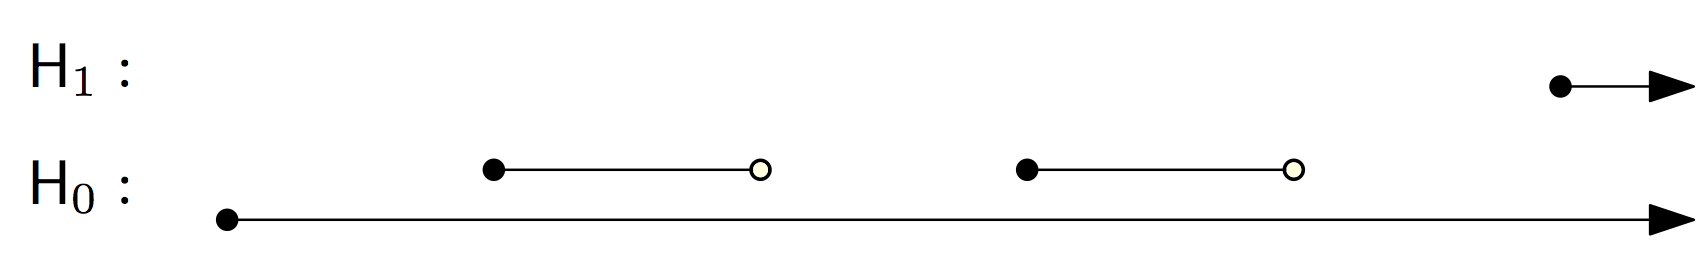

In [8]:
from IPython.display import Image
PATH = "/Users/krisanaya/repos/tda-gudhi/notebooks/img/"
Image(filename = PATH + "barcode.png", width=20000, height=500)

In [9]:
from itertools import combinations 
from itertools import chain
  
def rSubset(arr:list, r:int) -> list: 
    """
    :param arr is a python list
    :param r is an python int
    :return a subSet of the given list
    """
    return list(combinations(arr, r)) 
  
def SimplicialComplex(simplex:list) -> list:
    """
    builds a simplicial complex
    :param  list
    :return a list of the complex
    
    """
    complex = [list(map(list, rSubset(simplex, index + 1))) 
               for index, _ in enumerate(simplex)]
    merge_complex =  list(chain(*complex))
    return [d.Simplex(vertices) for vertices in merge_complex]

def persistencePairing(complex: list):
    """
    prints pairings of complexies
    :param complex 
    """
    filteration = d.Filtration(complex)
    filteration.sort()
    matrixHomology = d.homology_persistence(filtration)
    for index in range(len(matrixHomology)):
        if matrixHomology.pair(index) < index:
            continue
        dim = filtration[index].dimension()
        if matrixHomology.pair(index) != matrixHomology.unpaired:
            print(" ")
            print(f"******* Index-{index} *******")
            print("dimension: ", dim)
            print("index: ", index)
            print("pair: ", matrixHomology.pair(index))
            print(f"******* endIndex-{index} *******")
            print(" ")
        else:
            print(" ")
            print(f"******* Index-{index} *******")
            print("dimension: ", dim)
            print("index: ", index)
            print(f"******* endIndex-{index} *******")
            print(" ")
    

In [10]:
# let's create an 8sphere
simplex9 = d.Simplex([0,1,2,3,4,5,6,7,8,9])
sphere8  = d.closure([simplex9], 8)



Homology. Dionysus doesn’t compute homology directly, but we can get it as a by-product of persistent homology.

In [11]:
matrixHomology = d.homology_persistence(filtration, method = 'column')

In [12]:
filtration = d.Filtration(sphere8)
filtration.sort()
matrixHomology = d.homology_persistence(filtration, method='column')
dgms = d.init_diagrams(matrixHomology, filtration)
for index, dgm in enumerate(dgms):
    print("Dimension:", index)
    for pt in dgm:
        print("index, birth, death")
        print(index, pt.birth, pt.death)

Dimension: 0
index, birth, death
0 0.0 inf
Dimension: 1
Dimension: 2
Dimension: 3
Dimension: 4
Dimension: 5
Dimension: 6
Dimension: 7
Dimension: 8
index, birth, death
8 0.0 inf


# ploting dgrms


In [13]:
points = np.random.random((100, 2))

In [14]:
points

array([[6.61995410e-02, 8.07778956e-02],
       [6.37495227e-02, 6.49085460e-01],
       [3.97744808e-01, 5.78208354e-01],
       [8.57781461e-01, 5.69794875e-01],
       [1.72066084e-01, 4.03239770e-01],
       [6.94062644e-01, 3.70495388e-01],
       [2.89412980e-01, 9.45270125e-01],
       [6.70631771e-02, 2.37677441e-02],
       [9.41744158e-01, 4.26474672e-01],
       [3.44345837e-01, 3.17377689e-01],
       [7.42739108e-01, 7.02790500e-01],
       [1.41209067e-01, 6.57682711e-01],
       [4.03391956e-01, 9.14516878e-01],
       [2.93939373e-02, 4.90747039e-01],
       [8.39170660e-01, 5.97436388e-02],
       [7.44347068e-01, 5.66457763e-01],
       [9.39493668e-01, 8.63142983e-01],
       [3.60597641e-01, 7.34086092e-01],
       [4.80038707e-01, 2.91421985e-01],
       [1.94317074e-02, 6.26640618e-01],
       [3.81504592e-01, 7.50856143e-01],
       [3.65932341e-01, 1.92839775e-01],
       [4.95843095e-01, 8.00044310e-01],
       [1.44878380e-01, 9.33561142e-01],
       [6.142239

In [15]:
filteration = d.fill_rips(points, 2, 1.)
filteration.sort()
matrixHomology = d.homology_persistence(filteration, method='column')
dgms = d.init_diagrams(matrixHomology, filteration)
# for index, dgm in enumerate(dgms):
#     print("Dimension:", index)
#     for pt in dgm:
#         print("index, birth, death")
#         print(index, pt.birth, pt.death)

In [18]:
dgms[1]

Diagram with 17 points

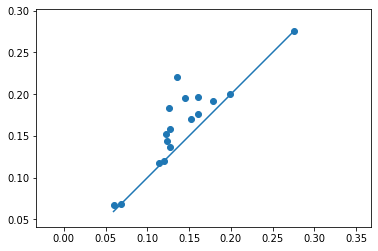

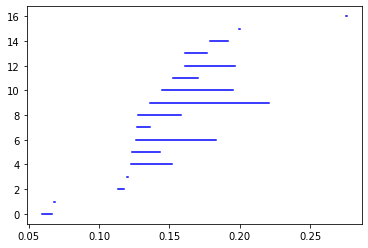

In [20]:
d.plot.plot_diagram(dgms[1], show = True)
d.plot.plot_bars(dgms[1], show = True)

In [59]:
dgms[0]

Diagram with 100 points